# Mark-Recapture Homework

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let:

N = Number of animals in the population

n = Number of animals marked on the first visit

K = Number of animals captured on the second visit

k = Number of recaptured animals that were marked

Chapman estimation equation:

${\displaystyle {\hat {N}}_{C}={\frac {(K+1)(n+1)}{k+1}}-1}$

In [8]:
# Play around with getting average estimation:
nsteps = 100
estimation = np.zeros(nsteps)
avg_estimation = np.average(estimation) # fill the empty array of estimations
print(avg_estimation)

# Try again:
nsteps = 100
ntraces = 2
estimation = np.zeros(nsteps)
estimates = np.zeros(shape=(nsteps,ntraces))
for trace in range(ntraces):
    estimates[0,trace] = estimation

0.0


ValueError: setting an array element with a sequence.

<IPython.core.display.Javascript object>


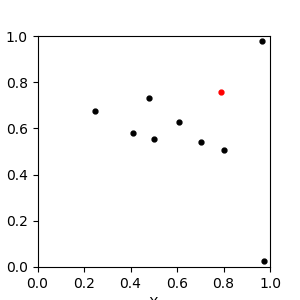

<IPython.core.display.Javascript object>


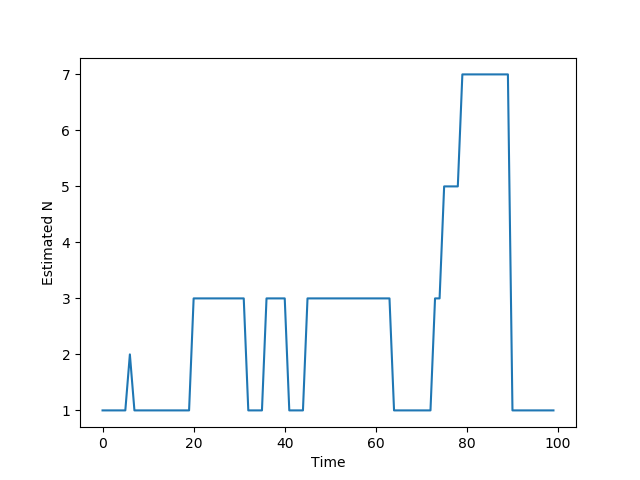

In [6]:
%matplotlib notebook


N = 10 # Total number of animals in the population
nsteps = 100
ntraces = 2
vmin = 0.01
vmax = 0.05

x = np.random.uniform(low=0, high=1, size=N)
y = np.random.uniform(low=0, high=1, size=N)

vx = np.random.uniform(low=vmin, high=vmax, size=N)*(2*np.random.randint(low=0, high=2, size=N)-1)
vy = np.random.uniform(low=vmin, high=vmax, size=N)*(2*np.random.randint(low=0, high=2, size=N)-1)

# Mark:
trapsize = 0.3
color = np.where(np.logical_and(x<trapsize, y<trapsize), 1, 0)
n = np.sum(color) # Number of animals marked on first visit
estimation = np.zeros(nsteps)

fig = plt.figure(figsize=(3,3));

estimates = np.zeros(shape=(nsteps,ntraces))

for trace in range(ntraces):
    estimates[0,trace] = estimation

# Main loop:
    for t in range(nsteps):
        x += vx
        y += vy

        # Reflect animals that reach boundaries:
        vx = np.where(np.logical_or(x<0, x>1), -vx, vx)
        vy = np.where(np.logical_or(y<0, y>1), -vy, vy)

        # Recapture:
        K = np.sum(np.logical_and(x<trapsize, y<trapsize)) # Total number of animals captured on second visit
        k = np.sum(np.logical_and(x<trapsize, y<trapsize)*color) # Number of recaptured animals that were marked
        estimation[t] = (K+1)/(k+1)*(n+1)-1

        # Figure 1:
        plt.cla();
        plt.plot(x[color==1], y[color==1], 'r.', markersize=7);
        plt.plot(x[color==0], y[color==0], 'k.', markersize=7);
        plt.xlim(0,1);
        plt.ylim(0,1);
        plt.xlabel('X');
        plt.ylabel('Y');
        fig.canvas.draw();
    
# Figure 2:
plt.figure();
plt.subplot(1,2,1);
plt.plot(estimation);
plt.xlabel('Time');
plt.ylabel('Estimated N');

plt.subplot(1,2,2);
plt.plot(np.average(estimates))
    